In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='pastel')

In [81]:
df = pd.read_csv('titanic-data-6.csv')

# Definição dos dados
Antes de iniciar a avaliação dos dados, é importante ter noção do que representa cada coluna do DataFrame. Abaixo segue tabela explicativa.

| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

[Fonte](https://www.kaggle.com/c/titanic)

### Observações sobre os dados

pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1.  
If the age is estimated, is it in the form of xx.5  

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  
[Fonte](https://www.kaggle.com/c/titanic)

### Nome das colunas e tipo de dados

In [82]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### Amostra dos dados

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Breve detalhamento das colunas

In [85]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Limpeza dos dados

Primeiramente deve-se verificar a quantidade de dados nulos, para então ajustar os dados

In [86]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Foi identificado que as colunas que possuem dados nulos são 'Age', 'Cabin' e 'Enbarked'

##### Verificar a quantidade de dados duplicados

In [87]:
df.duplicated().sum() #Verificar quantidade de dados duplicados

0

Não há dados duplicados neste dataframe

#### Prosseguindo com a limpeza dos dados

In [88]:
df.Age.fillna(df.Age.median(), inplace=True) #A idade foi preenchida com a mediana de todo o conjunto de dados

In [89]:
df.Age.median()

28.0

In [90]:
df.Cabin.fillna('None', inplace=True) #A cabine foi preenchida com None

In [91]:
df.Embarked.fillna('None',inplace=True) #Local de embarcação foi preenchida com None

# Perguntas
---

### Quantas pessoas sobreviveram e quantas não sobreviveram?

Para responder a esta pergunta, primeiramente é necessário separar o dataframe em 2, um com os sobreviventes e outro com os que não sobreviveram

#### Filtrar dataframe apenas dos que sobreviveram e que não sobreviveram

In [92]:
df_survived = df.query("Survived == 1")
df_died = df.query("Survived == 0")

In [93]:
df_survived.shape

(342, 12)

In [94]:
df_died.shape

(549, 12)

In [95]:
print('Total de passageiros: ' + str(df.PassengerId.count()) + 
      ". Sobreviventes: " + str(df_survived.PassengerId.count()) + 
      ". Mortos: " + str(df_died.PassengerId.count()))

Total de passageiros: 891. Sobreviventes: 342. Mortos: 549


Com os dados filtrados, podemos montar um gráfico que demonstra lado a lado o número obtido

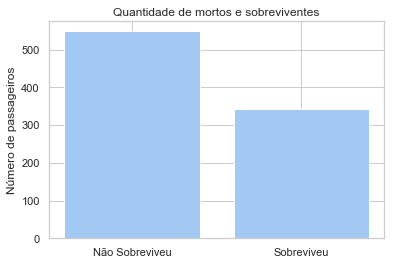

In [96]:
se_survivals = pd.Series(df['Survived'].groupby(df['Survived']).count())

locations = [1, 2]
heights = se_survivals
labels = ['Não Sobreviveu', 'Sobreviveu']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de mortos e sobreviventes')
plt.ylabel('Número de passageiros');

No navio havia o total de 891 pessoas, dentre essas, 549 não sobreviveram e 342 sobreviveram.

### Qual o número de homens e mulheres que sobreviveram?

Para responder a esta pergunta, foi agrupado a quantidade de homens e mulheres em uma Series, para gerar os gráficos e apresentar os resultados

In [97]:
se_gender_survived = pd.Series(df_survived['Sex'].groupby(df['Sex']).count())

In [98]:
print("Sobreviveram: {} mulheres e {} homens".format(se_gender_survived[0],se_gender_survived[1]))

Sobreviveram: 233 mulheres e 109 homens


Com os dados devidamente agrupados, podemos prosseguir com a visualização do gráfico

Text(0.5, 0, 'Sexo')

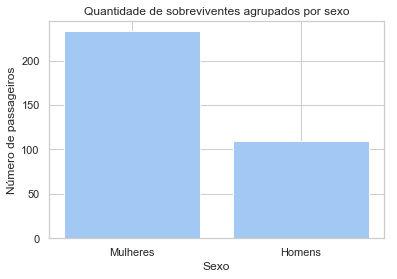

In [99]:
locations = [1, 2]
heights = se_gender_survived
labels = ['Mulheres', 'Homens']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de sobreviventes agrupados por sexo')
plt.ylabel('Número de passageiros');
plt.xlabel('Sexo')

 É notório no gráfico acima que sobreviveram mais mulheres do que homens, isto no leva a crer que a famosa frase "Mulheres e crianças primeiro" foi levada a sério na tragédia do Titanic

### Pessoas mais jovens foram as que mais sobreviveram?

Para responder a tal pergunta, foi separado os dados dos sobreviventes e não sobreviventes em dois Arrays, para que fosse possível gerar o histograma das informações.

In [100]:
ages_survived = np.array(df_survived['Age'])
ages_died = np.array(df_died['Age'])

In [101]:
print("A média de idade dos que sobreviveram foi {}".format(ages_survived.mean().round()))

A média de idade dos que sobreviveram foi 28.0


In [102]:
print("A média de idade dos que não sobreviveram foi {}".format(ages_died.mean().round()))

A média de idade dos que não sobreviveram foi 30.0


Text(0.5, 0, 'Idade')

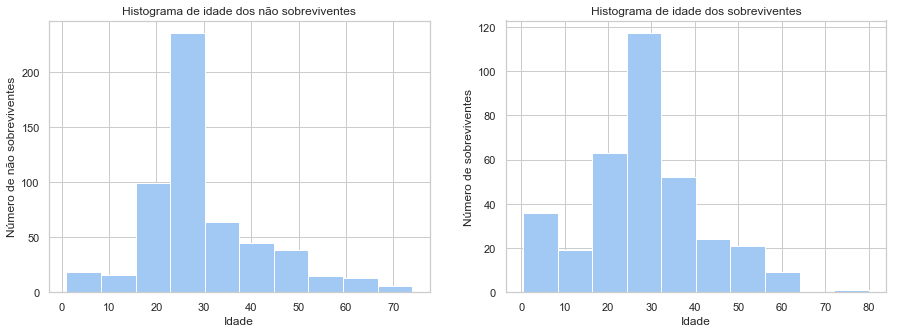

In [103]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.hist(ages_died)
ax1.set_title('Histograma de idade dos não sobreviventes')
ax1.set_ylabel('Número de não sobreviventes');
ax1.set_xlabel('Idade')

ax2.hist(ages_survived)
ax2.set_title('Histograma de idade dos sobreviventes')
ax2.set_ylabel('Número de sobreviventes');
ax2.set_xlabel('Idade')

Pelos gráficos é possível perceber que a maioria dos que conseguiram se salvar estavam na faixa dos 20~30 anos.

### Pessoas da 1ª Classe foram a maioria entre os sobreviventes?

Esta pergunta me surgiu pois me recordei de um momento do filme 'Titanic' onde muitos botes salva-vidas estavam saindo com poucas pessoas dentro, mesmo que houvesse espaço eles não permitiam outras pessoas se salvassem. 

Para analisar estes dados, foi criado uma Series agrupando o total de cada classe de Ticket

In [104]:
se_survived_class = pd.Series(df_survived['Pclass'].groupby(df_survived['Pclass']).count())

In [105]:
se_survived_class

Pclass
1    136
2     87
3    119
Name: Pclass, dtype: int64

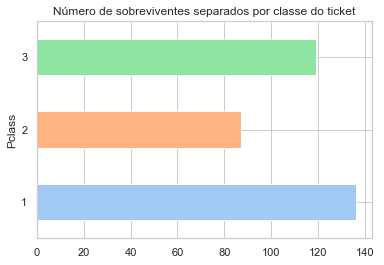

In [106]:
se_survived_class.plot.barh(title='Número de sobreviventes separados por classe do ticket')

Pelo gráfico acima é possível perceber que pessoas que estavam na 1ª classe sobreviveram mais do que as outras classes.

### Pessoas sozinhas foram as que mais sobreviveram?

É de se acreditar que pessoas que estavam sozinhas se salvaram mais, pois não tinham que se preocupar com a segurança de seus entes queridos.

Primeiramente foi criado um conjunto de dados agrupando a quantidade de Pais/Mães e Filhos que acompanhavam o passageiro

In [107]:
parch_df_survived = pd.Series(df_survived['Parch'].groupby(df_survived['Parch']).count())

In [108]:
parch_df_survived

Parch
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

---

Em seguida, foi criado um conjunto de dados agrupando a quantidade de Irmãos/Irmãs, Maridos/Esposas

In [109]:
sibsp_df_survived = pd.Series(df_survived['SibSp'].groupby(df_survived['SibSp']).count())

In [110]:
sibsp_df_survived

SibSp
0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

---

Com os dados devidamente filtrados, podemos verificar os resultados nos gráficos abaixo

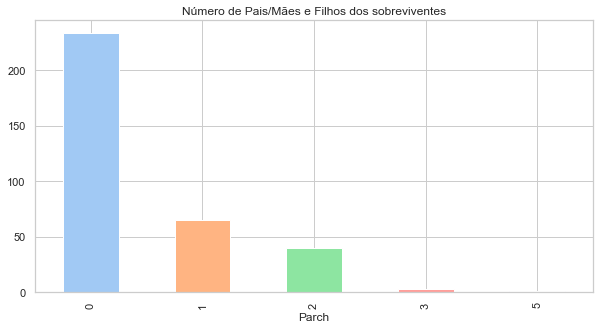

In [111]:
parch_df_survived.plot.bar(title="Número de Pais/Mães e Filhos dos sobreviventes", figsize=(10,5))

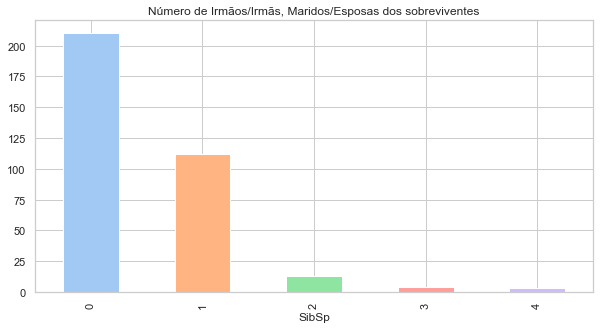

In [112]:
sibsp_df_survived.plot.bar(title="Número de Irmãos/Irmãs, Maridos/Esposas dos sobreviventes", figsize=(10,5))

Analisando ambos os gráficos é notável que as pessoas que estavam sozinhas foram as que mais sobreviveram. Quanto maior o número de acompanhantes, menor é a taxa de sobrevivencia.

### Pessoas acompanhadas foram as que mais morreram?

A partir das informações anteriores fica a indagação, Será que as pessoas que estavam acompanhadas foram as que mais morreram? Isto seria um fator relevante para a sobrevivencia do passageiro ou não?

Para responder tal pergunta, separei novamente os dados em Series, agora utilizando as informações daqueles que não sobreviveram.

In [113]:
parch_df_died = pd.Series(df_died['Parch'].groupby(df_died['Parch']).count())

In [114]:
parch_df_died

Parch
0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: Parch, dtype: int64

In [115]:
sibsp_df_died = pd.Series(df_died['SibSp'].groupby(df_died['SibSp']).count())

In [116]:
sibsp_df_died

SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: SibSp, dtype: int64

Com os dados devidamente filtrados, podemos prosseguir com a análise dos gráficos

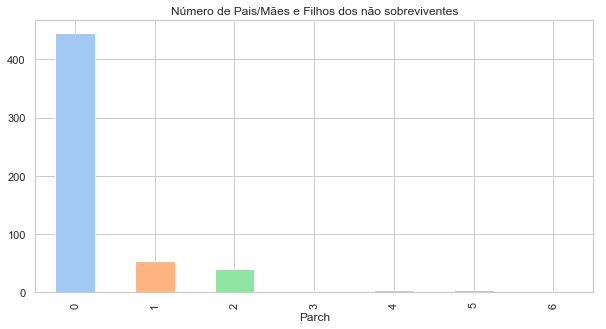

In [117]:
parch_df_died.plot.bar(title="Número de Pais/Mães e Filhos dos não sobreviventes", figsize=(10,5))

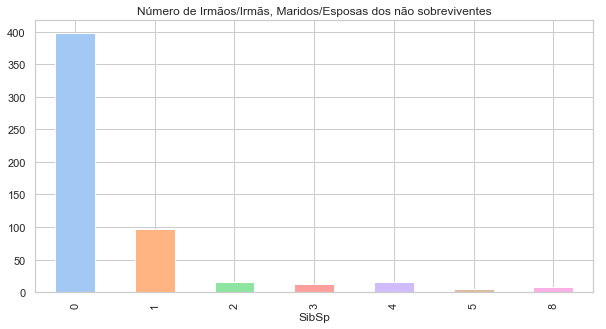

In [118]:
sibsp_df_died.plot.bar(title="Número de Irmãos/Irmãs, Maridos/Esposas dos não sobreviventes", figsize=(10,5))

É curioso notar que o mesmo efeito ocorre para as pessoas que não sobreviveram. A grande maioria não estava companhada dos pais ou filhos, ainda que inconclusivo, é possível dizer que estar acompanhado não foi um fator primordial para a morte dos passageiros.

# Conclusões
---

A partir da análise das informações anteriores e dos gráficos, foi possível notar que dentre os 891 passageiros que estavam nesta amostra de dados, 342 sobreviveram(cerca de 38%) e 549 não sobreviveram(cerca de 62%).

Dentre os sobreviventes, foi possível notar que as mulheres foram as que mais se salvaram, pois sobreviveram 233 mulheres e 109 homens.

Com relação a idade, a média de idade dos que sobreviveram foi de 28.0, enquanto a média de idade dos que não sobreviveram foi de 30.0. 
Esta media está possívelmente relacionada com o fato de que faltavam muitas informações sobre a idade dos passageiros, portanto, no processo de limpeza dos dados, foi adicionado a mediana de todo o dataframe, que seria 28.0.

Quanto à passageiros que estavam em classes melhores, foi possível constatar que passageiros da 1ª foram os que mais sobreviveram.

Analisando a quantidade de familiares e acompanhantes que os passageiros tinham no navio, foi possível notar que a maioria dos que sobreviveram, e que não sobreviveram, não estavam acompanhados de seus entes queridos.